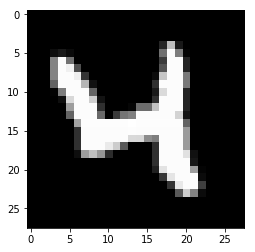

In [8]:
from __future__ import print_function 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

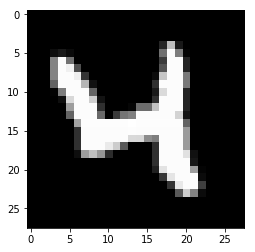

(60000, 28, 28)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
plt.imshow(X_train[20], cmap='gray')
plt.show()

print(X_train.shape)
X_train = X_train.reshape(60000, X_train.shape[1]**2).astype('float32')/255
X_test = X_test.reshape(10000, X_test.shape[1]**2).astype('float32')/255
print(X_train.shape)
print(X_train)

In [25]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [26]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:',score[0])
print('Accuracy:',score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 35us/step - loss: 0.5471 - acc: 0.8372 - val_loss: 0.1906 - val_acc: 0.9503
Epoch 2/5
54000/54000 [==============================] - 2s 30us/step - loss: 0.2848 - acc: 0.9180 - val_loss: 0.1458 - val_acc: 0.9640
Epoch 3/5
54000/54000 [==============================] - 2s 32us/step - loss: 0.2317 - acc: 0.9329 - val_loss: 0.1210 - val_acc: 0.9672
Epoch 4/5
54000/54000 [==============================] - 2s 29us/step - loss: 0.1994 - acc: 0.9410 - val_loss: 0.1034 - val_acc: 0.9697
Epoch 5/5
54000/54000 [==============================] - 2s 32us/step - loss: 0.1825 - acc: 0.9462 - val_loss: 0.0977 - val_acc: 0.9732
Loss: 0.11338687626570464
Accuracy: 0.9671
